<a href="https://colab.research.google.com/github/boscoybarra/Computer-Vision-Convnet-Experiment/blob/master/Computer_Vision_Convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up Kaggle on Google Collab


In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"your-users-name","key":"TOKEN-KEY_FROM-KAGGLE"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
# If you get a 401 error this might be because your token has expired. Try creating a new one on kaggle.com and update the key on the previous cell
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!ls -a

.  ..  .config	.kaggle  sample_data


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{~/content}

- path is now set to: {~/content}


In [0]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
chicago/chicago-copa-cases                              Chicago COPA Cases                                  3MB  2019-04-05 00:00:32            945  
himanshupoddar/zomato-bangalore-restaurants             Zomato Bangalore Restaurants                       88MB  2019-03-31 09:48:43           1039  
sfinspiredu/synchrotron-data-set                        Synchrotron Data Set                               10KB  2019-05-27 19:54:29            167  
crisparada/brazilian-cities                             Brazilian Cities                                  935KB  2019-05-24 20:49:21            615  
taniaj/australian-election-2019-tweets                  Australian Election 2019 Tweets             

In [0]:
!kaggle datasets list -s sentiment

ref                                                    title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------  ------  -------------------  -------------  
harriken/emoji-sentiment                               Emoji sentiment                                 13MB  2017-10-01 09:56:54           1938  
crowdflower/twitter-airline-sentiment                  Twitter US Airline Sentiment                     3MB  2016-10-06 03:11:23          25797  
bittlingmayer/amazonreviews                            Amazon Reviews for Sentiment Analysis          493MB  2017-05-24 13:05:13          14177  
kazanova/sentiment140                                  Sentiment140 dataset with 1.6 million tweets    84MB  2017-09-13 22:43:19          11950  
crowdflower/first-gop-debate-twitter-sentiment         First GOP Debate Twitter Sentiment               3MB  2016-10-06 03:1

## Download the dataset from Kaggle

In [0]:
# Make sure you accept the competitions rules
!kaggle competitions download -c dogs-vs-cats -p /content

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 82.2MB/s]
 98% 266M/271M [00:03<00:00, 75.3MB/s]
100% 271M/271M [00:03<00:00, 80.4MB/s]
 97% 525M/543M [00:11<00:00, 50.9MB/s]
100% 543M/543M [00:11<00:00, 51.2MB/s]


In [0]:
#lets check what we have
!ls

sample_data  sampleSubmission.csv  test1.zip  train.zip


In [0]:
#we unzip files
!unzip \*.zip

Archive:  test1.zip
   creating: test1/
  inflating: test1/1.jpg             
  inflating: test1/10.jpg            
  inflating: test1/100.jpg           
  inflating: test1/1000.jpg          
  inflating: test1/10000.jpg         
  inflating: test1/10001.jpg         
  inflating: test1/10002.jpg         
  inflating: test1/10003.jpg         
  inflating: test1/10004.jpg         
  inflating: test1/10005.jpg         
  inflating: test1/10006.jpg         
  inflating: test1/10007.jpg         
  inflating: test1/10008.jpg         
  inflating: test1/10009.jpg         
  inflating: test1/1001.jpg          
  inflating: test1/10010.jpg         
  inflating: test1/10011.jpg         
  inflating: test1/10012.jpg         
  inflating: test1/10013.jpg         
  inflating: test1/10014.jpg         
  inflating: test1/10015.jpg         
  inflating: test1/10016.jpg         
  inflating: test1/10017.jpg         
  inflating: test1/10018.jpg         
  inflating: test1/10019.jpg         
  inflatin

In [0]:
#

In [0]:
import pandas as pd
d = pd.read_csv('sampleSubmission.csv')
d.head()

id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0

## Training a convnet

The Dogs vs. Cats dataset that you’ll use isn’t packaged with Keras. It was made available by Kaggle as part of a computer-vision competition in late 2013, back when convnets weren’t mainstream. You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data (you’ll need to create a Kaggle account if you don’t already have one—don’t worry, the process is painless).

In [0]:
import os, shutil

original_dataset_dir = './train'
base_dir = '/content/cats_and_dogs_small_good'
# commented this line since we already have this file
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test1')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    print(src)
    dst = os.path.join(train_cats_dir, fname)
    print(dst)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


./train/cat.0.jpg
/content/cats_and_dogs_small_good/train/cats/cat.0.jpg
./train/cat.1.jpg
/content/cats_and_dogs_small_good/train/cats/cat.1.jpg
./train/cat.2.jpg
/content/cats_and_dogs_small_good/train/cats/cat.2.jpg
./train/cat.3.jpg
/content/cats_and_dogs_small_good/train/cats/cat.3.jpg
./train/cat.4.jpg
/content/cats_and_dogs_small_good/train/cats/cat.4.jpg
./train/cat.5.jpg
/content/cats_and_dogs_small_good/train/cats/cat.5.jpg
./train/cat.6.jpg
/content/cats_and_dogs_small_good/train/cats/cat.6.jpg
./train/cat.7.jpg
/content/cats_and_dogs_small_good/train/cats/cat.7.jpg
./train/cat.8.jpg
/content/cats_and_dogs_small_good/train/cats/cat.8.jpg
./train/cat.9.jpg
/content/cats_and_dogs_small_good/train/cats/cat.9.jpg
./train/cat.10.jpg
/content/cats_and_dogs_small_good/train/cats/cat.10.jpg
./train/cat.11.jpg
/content/cats_and_dogs_small_good/train/cats/cat.11.jpg
./train/cat.12.jpg
/content/cats_and_dogs_small_good/train/cats/cat.12.jpg
./train/cat.13.jpg
/content/cats_and_dogs_sma

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

### Use ImageDataGenerator to read images from directories

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# rescales all images to 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
def generator():
    i = 0
    while True:
        i += 1
        yield i

for item in generator():
    print(item)
    if item > 4:
        break

1
2
3
4
5


In [0]:
# Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 14s 139ms/step - loss: 0.6914 - acc: 0.5385 - val_loss: 0.6793 - val_acc: 0.5240
Epoch 2/30
100/100 [==============================] - 8s 82ms/step - loss: 0.6660 - acc: 0.5955 - val_loss: 0.6580 - val_acc: 0.6010
Epoch 3/30
100/100 [==============================] - 8s 82ms/step - loss: 0.6171 - acc: 0.6605 - val_loss: 0.6831 - val_acc: 0.5740
Epoch 4/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5834 - acc: 0.6980 - val_loss: 0.6079 - val_acc: 0.6530
Epoch 5/30
100/100 [==============================] - 8s 82ms/step - loss: 0.5333 - acc: 0.7430 - val_loss: 0.5945 - val_acc: 0.6920
Epoch 6/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5124 - acc: 0.7490 - val_loss: 0.6014 - val_acc: 0.6620
Epoch 7/30
100/100 [==============================] - 8s 83ms/step - loss: 0.4892 - acc: 0.7585 - val_loss: 0.6078 - val_acc: 0.6850
Epoch 8/30
100/100 

In [0]:
model.save('cats_and_dogs_small_1.h5')

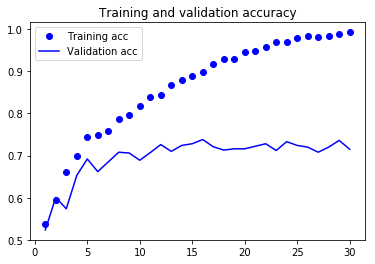

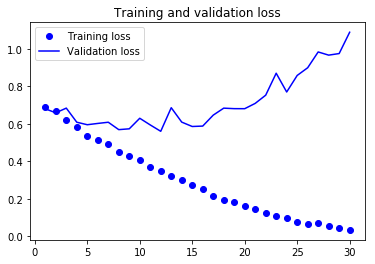

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In these graphts we can clearly see that we are indeed overfiting. 


*  Validarion acc stalls around 70-72% 
*  The minimum point calidation loss reaches is around epoch 5.
*  Training accuracy increases linearly over time
*  Training loss keeps decreasing linearly until it reaches nearly 0



### Data augmentation

A great tecnique to mitigate overfiting is data augmentation. We pass random modified images to our network so that it generalizes much better with we pass new unseen data

In [0]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



*  `rotation_range` is a value in degrees (0–180), a range within which to randomly rotate pictures.
* `width_shift `and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half the images horizontally—relevant when there are no assumptions of  horizontal asymmetry (for example, real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.



### Displaying some randomly augmented training images


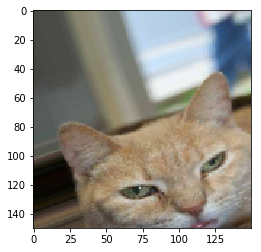

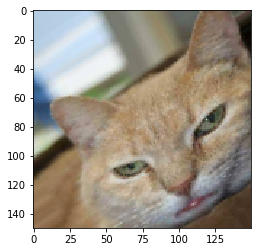

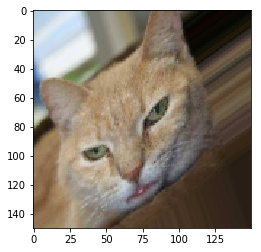

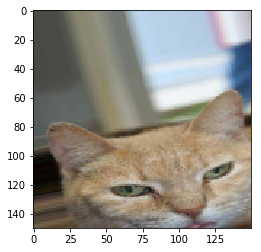

In [0]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 27s 272ms/step - loss: 0.6946 - acc: 0.5091 - val_loss: 0.6860 - val_acc: 0.5895
Epoch 2/100
100/100 [==============================] - 25s 245ms/step - loss: 0.6860 - acc: 0.5581 - val_loss: 0.6706 - val_acc: 0.6115
Epoch 3/100
100/100 [==============================] - 25s 248ms/step - loss: 0.6669 - acc: 0.5872 - val_loss: 0.6851 - val_acc: 0.5508
Epoch 4/100
100/100 [==============================] - 25s 245ms/step - loss: 0.6525 - acc: 0.6031 - val_loss: 0.6279 - val_acc: 0.6372
Epoch 5/100
100/100 [==============================] - 24s 245ms/step - loss: 0.6317 - acc: 0.6334 - val_loss: 0.7547 - val_acc: 0.5514
Epoch 6/100
100/100 [==============================] - 25s 247ms/step - loss: 0.6196 - acc: 0.6475 - val_loss: 0.5830 - val_acc: 0.6875
Epoch 7/100
100/100 [==============================] - 25s 247ms/step - loss: 0.6057 - acc: 0.6662 -

In [0]:
model.save('cats_and_dogs_small_2.h5')

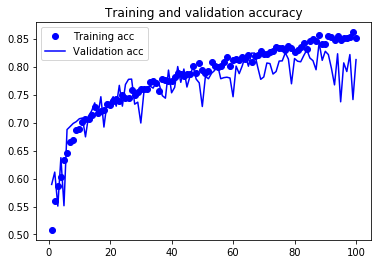

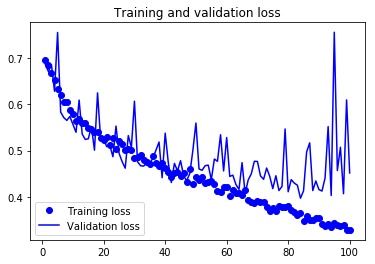

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### Thanks to data augmentation and dropout, we’re no longer overfitting: the training curves are closely tracking the validation curves. We now reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

```
# This is formatted as code
```



## Using a pretrained convnet

We to use a pretrained convnet?
Because we have so little data to work with. As a next step to improve accuracy on this problem, we’ll have to use a pretrained model.

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 1s 0us/step


* `weights` specifies the weight checkpoint from which to initialize the model.
* `include_top` refers to including (or not) the densely connected classifier on top of the network. By default, this densely connected classifier corresponds to the 1,000 classes from ImageNet. Because you intend to use your own densely connected classifier (with only two classes: cat and dog), you don’t need to include it.
* `input_shape` is the shape of the image tensors that you’ll feed to the network. This argument is purely optional: if you don’t pass it, the network will be able to process inputs of any size.

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

## Two ways to go, in order to use a pretrained convnet.
* First: with out data augmentation: less cheaper and fast
* Second: Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. 

### 1. Fast feature extraction without data augmentation

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/cats_and_dogs_small_good'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test1')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape (samples, 4, 4, 512). You’ll feed them to a densely connected classifier, so first you must flatten them to (samples, 8192)

In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

 Defining and training the densely connected classifier

In [0]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 422us/step - loss: 0.6134 - acc: 0.6580 - val_loss: 0.4205 - val_acc: 0.8420
Epoch 2/30
2000/2000 [==============================] - 1s 266us/step - loss: 0.4236 - acc: 0.8025 - val_loss: 0.3576 - val_acc: 0.8550
Epoch 3/30
2000/2000 [==============================] - 1s 266us/step - loss: 0.3583 - acc: 0.8480 - val_loss: 0.3196 - val_acc: 0.8720
Epoch 4/30
2000/2000 [==============================] - 1s 261us/step - loss: 0.3144 - acc: 0.8675 - val_loss: 0.2993 - val_acc: 0.8790
Epoch 5/30
2000/2000 [==============================] - 1s 257us/step - loss: 0.2817 - acc: 0.8870 - val_loss: 0.2800 - val_acc: 0.8910
Epoch 6/30
2000/2000 [==============================] - 1s 260us/step - loss: 0.2536 - acc: 0.8990 - val_loss: 0.2688 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 1s 259us/step - loss: 0.2496 - acc: 0.8975 - val_loss: 0.2612 - val_acc: 0.8950


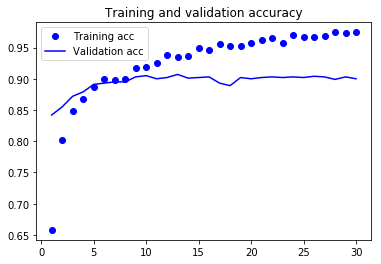

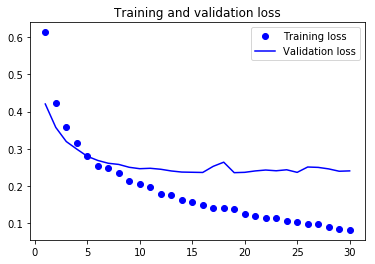

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2.  Adding a densely connected classifier on top of the convolutional base

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In Keras, you freeze a network by setting its trainable attribute to False:

In [0]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


#### NOTE: We most recompile the model again otherwise our changes will be ignored!

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 18s 183ms/step - loss: 0.5964 - acc: 0.6775 - val_loss: 0.4497 - val_acc: 0.8050
Epoch 2/30
100/100 [==============================] - 17s 170ms/step - loss: 0.4793 - acc: 0.7900 - val_loss: 0.3788 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 17s 170ms/step - loss: 0.4369 - acc: 0.8035 - val_loss: 0.3305 - val_acc: 0.8670
Epoch 4/30
100/100 [==============================] - 17s 169ms/step - loss: 0.4044 - acc: 0.8205 - val_loss: 0.3122 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 17s 169ms/step - loss: 0.3798 - acc: 0.8325 - val_loss: 0.2957 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 17s 168ms/step - loss: 0.3683 - acc: 0.8340 - val_loss: 0.2861 - val_acc: 0.8800
Epoch 7/30
100/100 [==============================] - 17s 168ms/step - loss: 0.3591 - acc: 0.8430 - val_lo

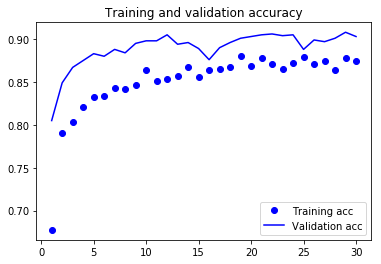

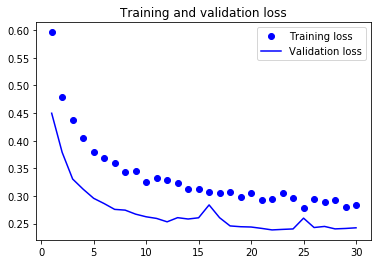

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Fine-tuning

 Thus the steps for fine-tuning a network are as follow:

* Add your custom network on top of an already-trained base network.
* Freeze the base network.
* Train the part you added.
* Unfreeze some layers in the base network.
* Jointly train both these layers and the part you added.

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

 Let’s set this up, starting from where you left off in the previous example.

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

RMSProp optimizer, using a very low learning rate. The reason for using a low learning rate is that you want to limit the magnitude of the modifications you make to the representations of the three layers you’re fine-tuning. Updates that are too large may harm these representations.

In [76]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 19s 194ms/step - loss: 0.2756 - acc: 0.8945 - val_loss: 0.2340 - val_acc: 0.9050
Epoch 2/100
100/100 [==============================] - 17s 174ms/step - loss: 0.2588 - acc: 0.8855 - val_loss: 0.2432 - val_acc: 0.9080
Epoch 3/100
100/100 [==============================] - 17s 174ms/step - loss: 0.2377 - acc: 0.9015 - val_loss: 0.2231 - val_acc: 0.9140
Epoch 4/100
100/100 [==============================] - 18s 175ms/step - loss: 0.2205 - acc: 0.9050 - val_loss: 0.2176 - val_acc: 0.9180
Epoch 5/100
100/100 [==============================] - 18s 177ms/step - loss: 0.2036 - acc: 0.9210 - val_loss: 0.3755 - val_acc: 0.8740
Epoch 6/100
100/100 [==============================] - 18s 179ms/step - loss: 0.1993 - acc: 0.9165 - val_loss: 0.1908 - val_acc: 0.9300
Epoch 7/100
100/100 [==============================] - 17s 174ms/step - loss: 0.1819 - acc: 0.9275 - val_loss: 0.2158 - val_acc: 0.9180
Epoch 8/100
100/100 [===========================

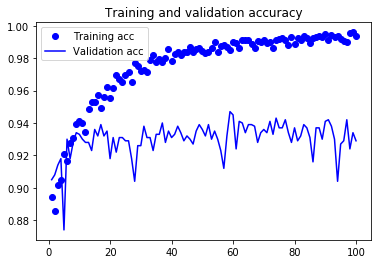

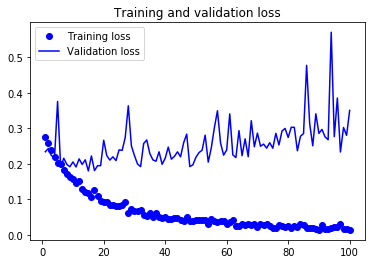

In [77]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Smoothed curves for training and validation accuracy for fine-tuning

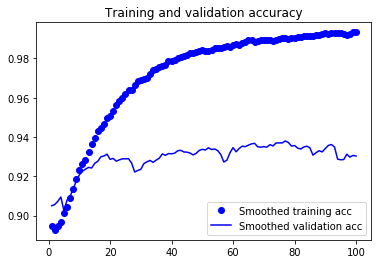

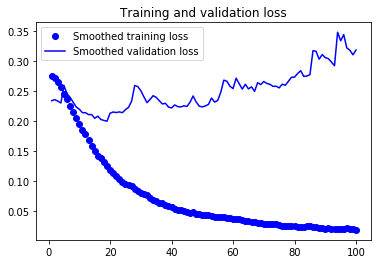

In [78]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [79]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.938999993801117


###  Visualizing intermediate activations

In [80]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [82]:
img_path = '/content/cats_and_dogs_small_good/test1/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)


(1, 150, 150, 3)


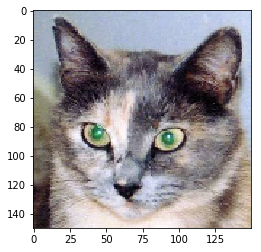

In [83]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)


In [0]:
activations = activation_model.predict(img_tensor)


In [87]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


Visualizing the fourth channel

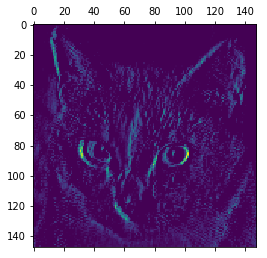

In [88]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Seventh channel of the activation of the first layer on the test cat picture

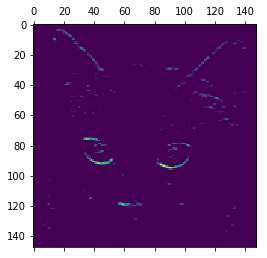

In [89]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


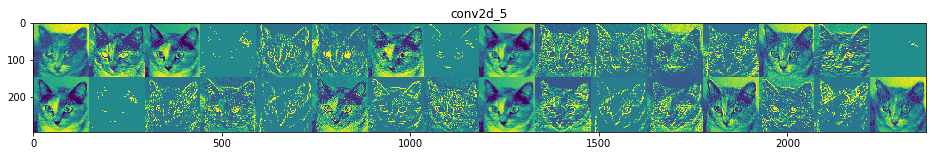

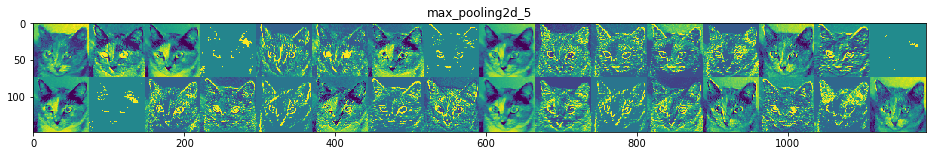

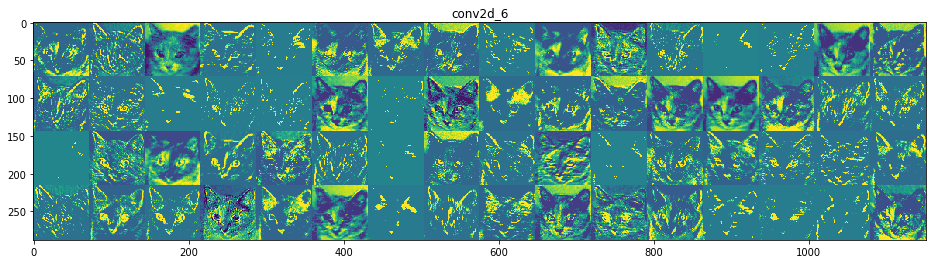

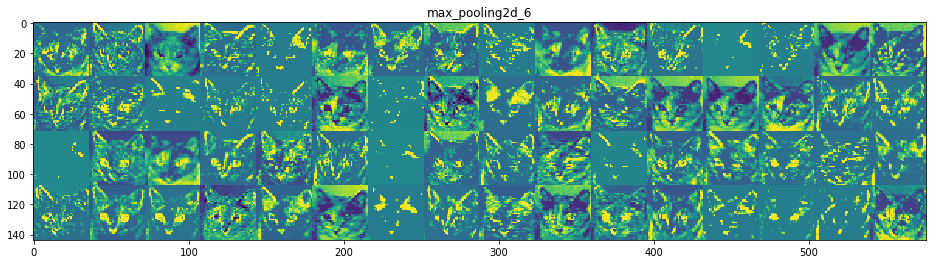

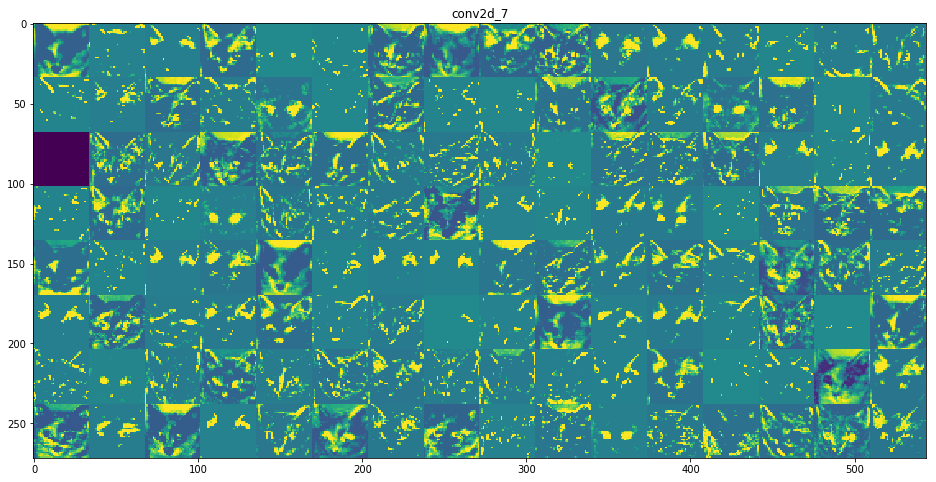

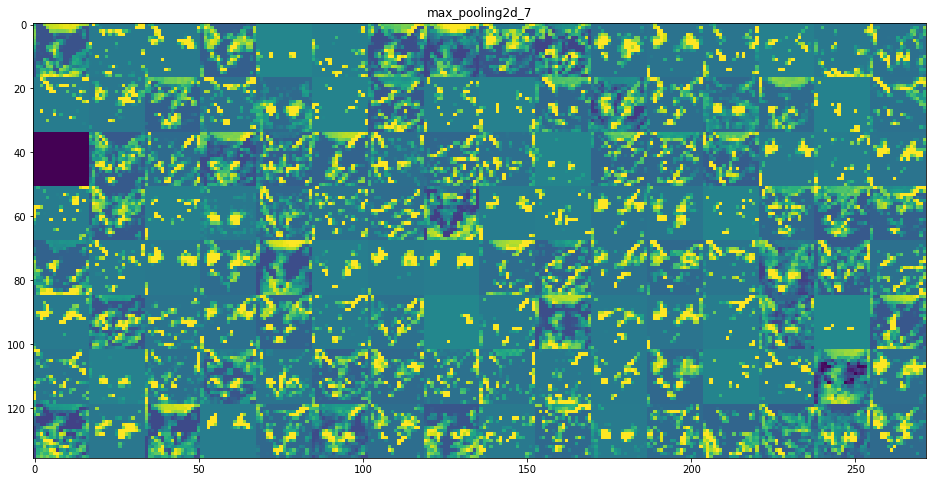

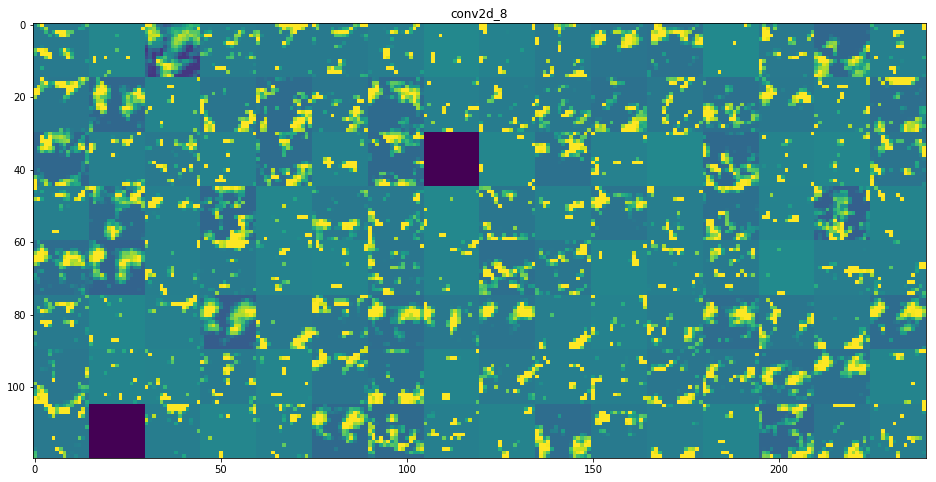

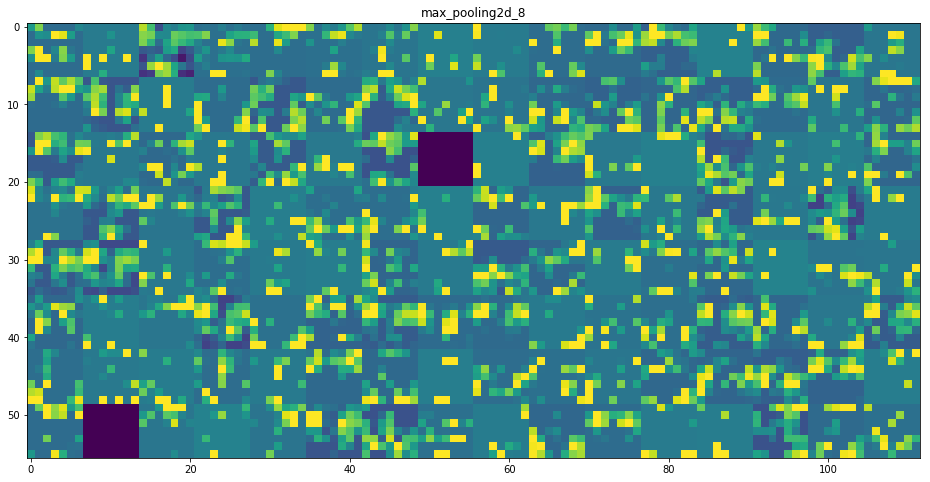

In [90]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

